In [1]:
import sys
sys.path.append('../')
from localconfig import BASE_PATH,EXPS

EXP=EXPS[0]
print(EXP)
print(BASE_PATH)

import pathlib
import numpy as np
np.set_printoptions(threshold=1050)
from pprint import pprint

import maxone_code.data
import maxone_code.fig
from maxone_code.data import Experiment
from maxone_code.artifact.remover import ArtifactAssay

takahashi1112
/Users/KozSakk/Documents/research/sakurayama/201911artifact_removal


## 計測データの読み込み
- 計測データ、計測電極、刺激電極を読み込む
- 指定した刺激インターバルから刺激開始フレームを推定。

In [2]:
path=pathlib.Path(BASE_PATH).joinpath('data',EXP,'raw','searching-5764-5764.raw.h5')
exp=Experiment(path,interval=20000)
exp.disp()

sig shape: (1028, 120000)
record time: 6[s]
record eles_size:  25
elec ids [6203, 5765, 5546, 5323, 5324, 5543, 5766, 5985, 5542, 5983, 5762, 5545, 5984, 5764, 6204, 5982, 6205, 6206, 5326, 5763, 5322, 6202, 5325, 5986, 5544]
channel ids [60, 72, 84, 88, 180, 192, 196, 208, 436, 536, 544, 548, 564, 600, 612, 636, 700, 712, 716, 720, 732, 740, 744, 752, 756]
trial start frame:  [20290, 40370, 60450, 80530, 100610]
stim interval:  [20080 20080 20080 20080]


## アーチファクトの検出と除去
- 計測データから計測電極のデータをとりだす
- 刺激電極のデータを取り除く
- 計測電極リストを刺激電極に近い順にする

In [3]:
# trialあたりにロードするframe数を指定
# trial間隔を超えないように注意
assay=ArtifactAssay(path,lookforframe=1000)
assay.exec()

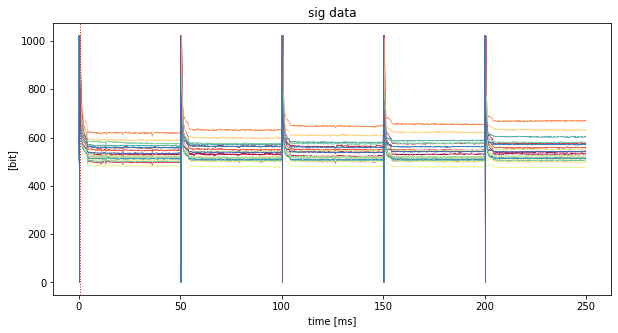

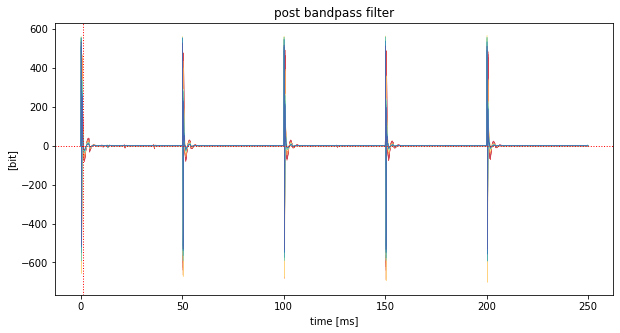

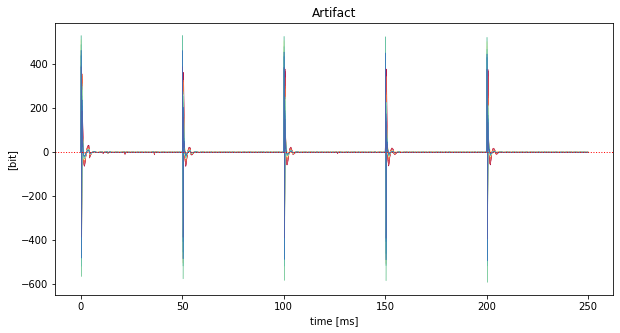

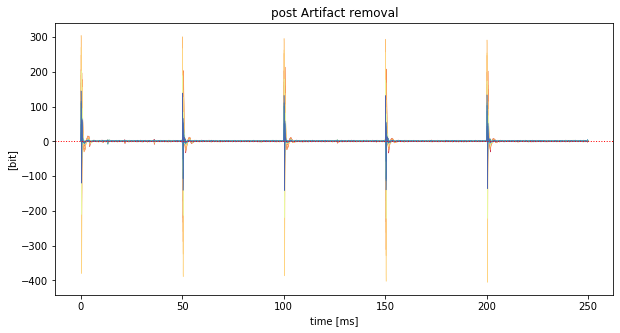

In [4]:
# trialをくっつけて、それぞれのデータを表示
assay.disp()

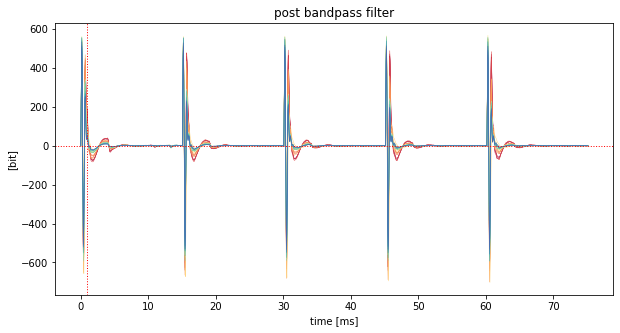

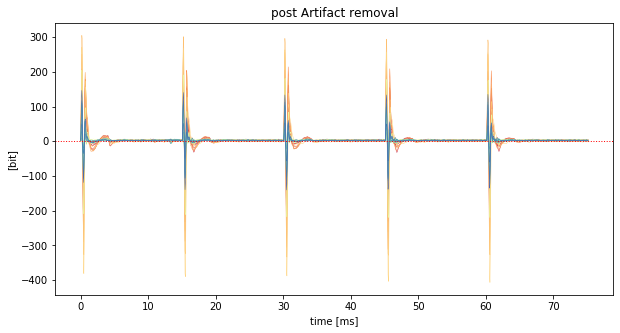

In [14]:
# 解析範囲の変更
start_frame=0
stop_frame=300
sel=np.s_[start_frame:stop_frame+1]
assay.cleanArtifact(sel)
assay.disp_filtered(isConcat=True)
assay.disp_cleaned(isConcat=True)

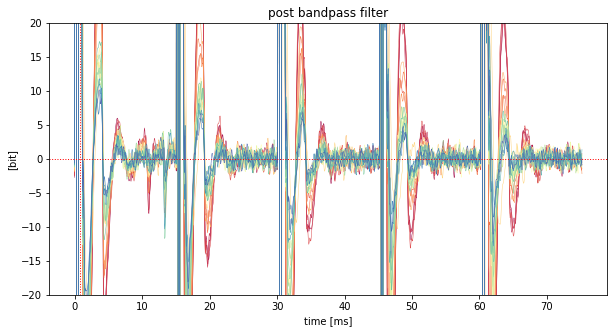

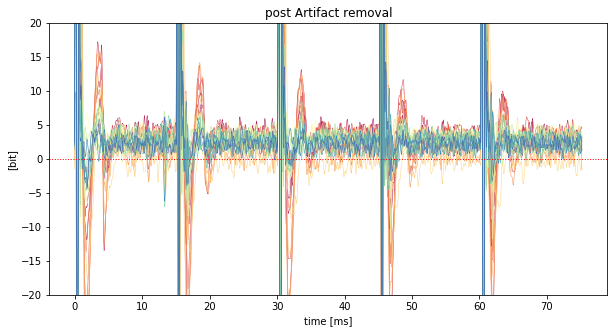

In [15]:
assay.disp_filtered(isConcat=True,yrange=[-20,20])
assay.disp_cleaned(isConcat=True,yrange=[-20,20])

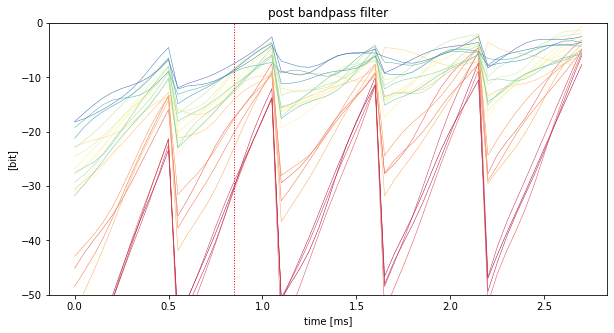

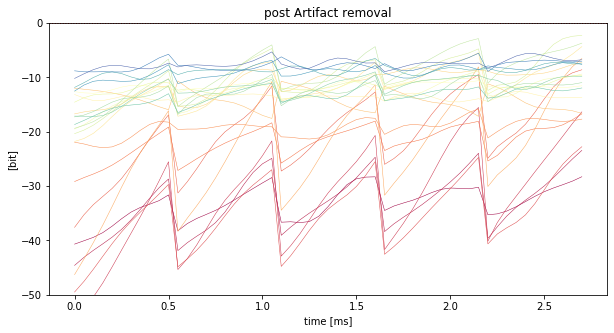

In [22]:
# 解析範囲の変更
start_frame=40
stop_frame=50
sel=np.s_[start_frame:stop_frame+1]
assay.cleanArtifact(sel)
assay.disp_filtered(isConcat=True,yrange=[-50,0])
assay.disp_cleaned(isConcat=True,yrange=[-50,0])